In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1 / (1 + np.exp(- x))

In [83]:
DataSet=pd.read_csv('arruela_.csv')

In [84]:
DataSet.drop(['Hora','Tamanho'], axis=1, inplace=True)

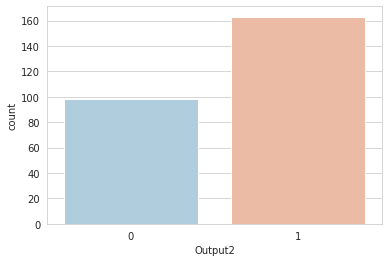

In [85]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


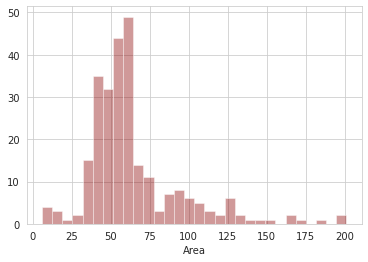

In [86]:
sns.distplot(DataSet['Area'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

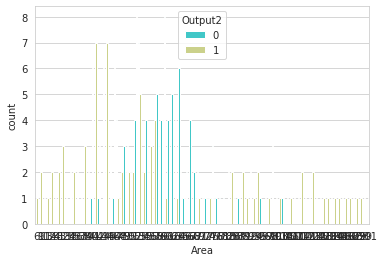

In [87]:
sns.set_style('whitegrid')
sns.countplot(x='Area',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

In [62]:
#sns.set_style('whitegrid')
#sns.countplot(x='NumAmostra',hue='Output2',data=DataSet,palette='rainbow')
#plt.show()

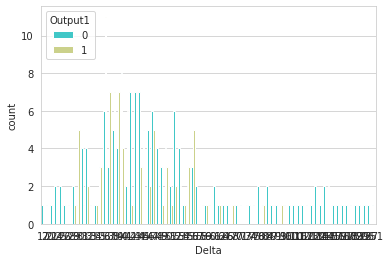

In [88]:
sns.set_style('whitegrid')
sns.countplot(x='Delta',hue='Output1',data=DataSet,palette='rainbow')
plt.show()

In [64]:
#X = DataSet[[ 'NumAmostra', 'Area', 'Delta']]
#y = DataSet[['Output1','Output2']]

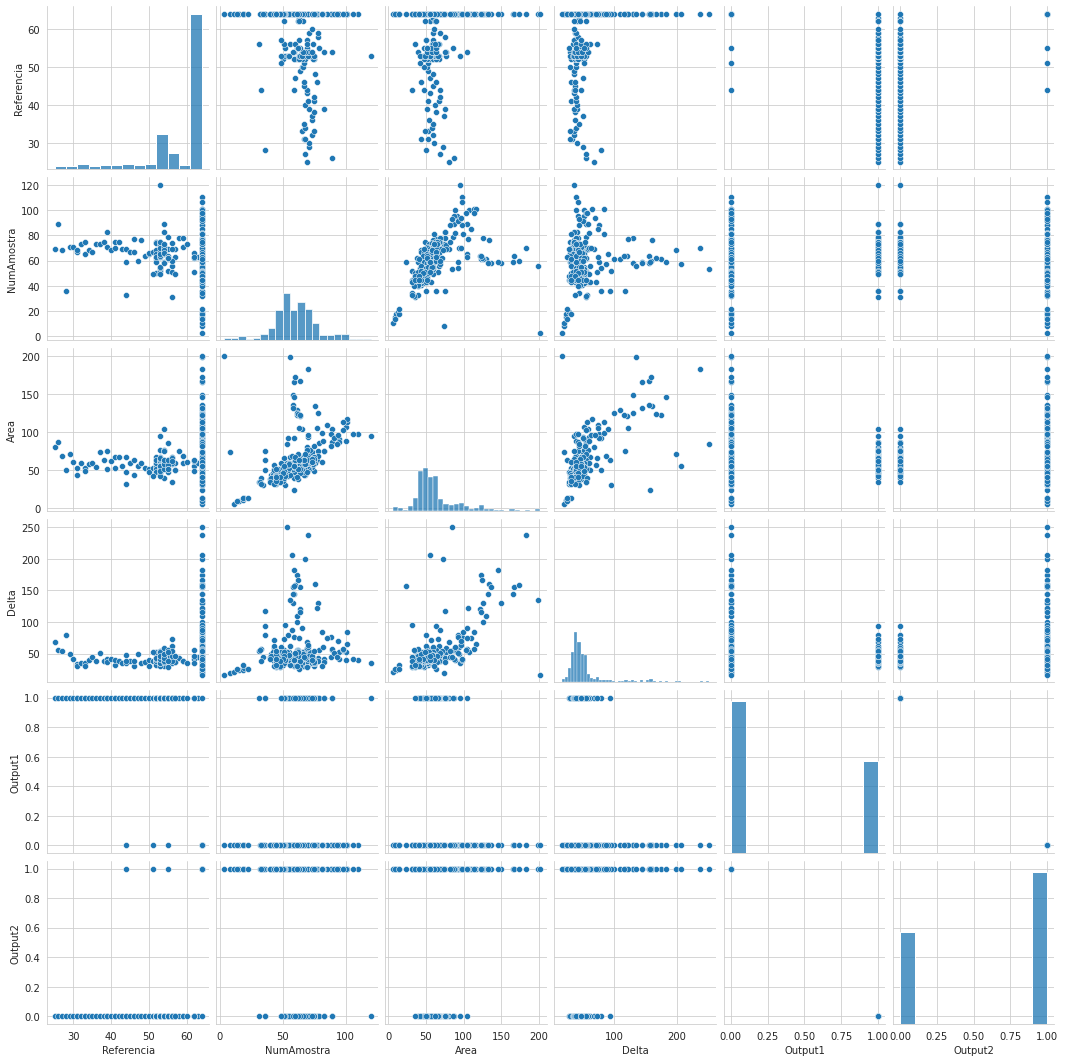

In [89]:
sns.pairplot(DataSet)
plt.show()

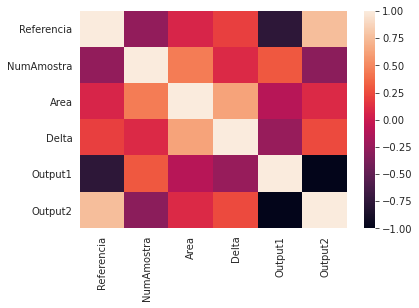

In [90]:
sns.heatmap(DataSet.corr())
plt.show()

In [92]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
DataScaled=scaler.fit_transform(DataSet)
#DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['NumAmostra', 'Area', 'Delta', 'Output1','Output2'])
DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['Area', 'Delta', 'Referencia', 'NumAmostra', 'Output1','Output2'])

In [93]:
X = DataSetScaled.drop(['Output1', 'Output2'],axis=1)
y = DataSet[['Output1','Output2']]

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

print(y_test)
print(X_test)

     Output1  Output2
89         1        0
212        0        1
218        0        1
96         1        0
88         1        0
..       ...      ...
22         1        0
42         1        0
160        0        1
93         1        0
50         1        0

[79 rows x 2 columns]
         Area     Delta  Referencia  NumAmostra
89  -0.469422  0.476377   -0.186366   -0.331089
212  0.619637 -0.856191   -1.036855   -0.725675
218  0.619637  1.229567   -0.088232   -0.669306
96  -0.251610 -1.667319   -0.938722    0.007127
88  -0.469422 -0.103000   -0.415344   -0.472013
..        ...       ...         ...         ...
22  -1.667386  0.534314   -0.251788   -0.528382
42  -0.142704  0.534314   -0.120943   -0.500197
160  0.619637  2.214508    1.285635    0.035312
93  -0.360516  0.128750    0.009901    0.035312
50   0.401825  0.360501   -0.055521   -0.387459

[79 rows x 4 columns]


In [95]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 4
N_hidden = 4
N_output = 2
learnrate = 0.2

In [96]:
#Pesos da Camada Oculta (Inicialização Aleatória)
weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
print('Pesos da Camada Oculta:')
print(weights_input_hidden)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta:
[[ 0.14909866  0.20854761  0.01846222  0.18900812]
 [ 0.03533283  0.00273738 -0.00529178  0.24593666]
 [ 0.02295731 -0.27067088 -0.01903651 -0.130015  ]
 [-0.10764128 -0.05489019  0.12158102 -0.11504246]]
Pesos da Camada de Saída:
[[ 0.12641718 -0.01908573]
 [-0.15481824 -0.03017909]
 [-0.10452294 -0.08489327]
 [-0.01805587  0.15467523]]


In [100]:
epochs = 50000
last_loss=None
EvolucaoError=[]
IndiceError=[]

for e in range(epochs):
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        # Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
        #-------------------------------------------    
    
        # Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h += hidden_error_term * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % (epochs / 20) == 0:
        hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        if last_loss and last_loss < loss:
            print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
        else:
            print("Erro quadrático no treinamento: ", loss)
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)

Erro quadrático no treinamento:  4.567025476294338e-05
Erro quadrático no treinamento:  1.3156998579494307e-05
Erro quadrático no treinamento:  5.16489854685093e-06
Erro quadrático no treinamento:  2.3841767778788466e-06
Erro quadrático no treinamento:  1.2227944758277262e-06
Erro quadrático no treinamento:  6.771243037980135e-07
Erro quadrático no treinamento:  3.9782515308991424e-07
Erro quadrático no treinamento:  2.4502382698708404e-07
Erro quadrático no treinamento:  1.568118780601634e-07
Erro quadrático no treinamento:  1.0357731245042596e-07
Erro quadrático no treinamento:  7.023424612312708e-08
Erro quadrático no treinamento:  4.8680719581162524e-08
Erro quadrático no treinamento:  3.4365206221465535e-08
Erro quadrático no treinamento:  2.4629151300581914e-08
Erro quadrático no treinamento:  1.7865733752790553e-08
Erro quadrático no treinamento:  1.3074256408602272e-08
Erro quadrático no treinamento:  9.61587605579258e-09
Erro quadrático no treinamento:  7.076118675913611e-09
E

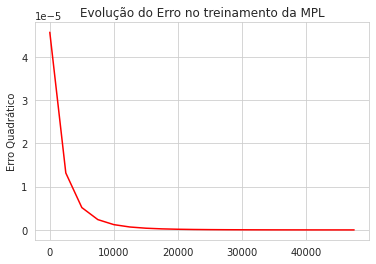

In [101]:
### Gráfico da Evolução do Erro
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()

In [103]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
predictions=0

for xi, yi in zip(X_test.values, y_test.values):

# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)

#-------------------------------------------
    
#Cálculo do Erro da Predição
        ## TODO: Cálculo do Erro        
        if (output[0]>output[1]):
            if (yi[0]>yi[1]):
                predictions+=1
                
        if (output[1]>=output[0]):
            if (yi[1]>yi[0]):
                predictions+=1

print("A Acurácia da Predição é de: {:.3f}".format(predictions/n_records))

A Acurácia da Predição é de: 0.949
